In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
pd.set_option('display.max_columns', None)

In [2]:
df_train=pd.read_csv('Train.csv')
df_test=pd.read_csv('Test.csv')

In [3]:
print(df_train.shape)
df_train.head()

(8523, 12)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
print(df_test.shape)
df_test.head()

(5681, 11)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
## There are categorical columns that need to be encoded
## There are columns with null values that need to be filled

## - Item_Weight column is Numerical
## - Outlet_Size is Categorical

In [7]:
(df_train.isnull().sum()/len(df_train))*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [8]:
## To fill the null values in Item_Weight, we need to check if the Item_Weight values have outliers

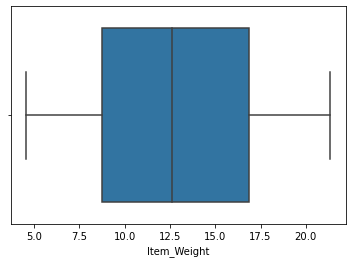

In [9]:
sb.boxplot(x='Item_Weight', data=df_train)

plt.show()

In [10]:
## There are no Outliers from the boxplot above

In [11]:
def null_col(data, col):
    data=data.loc[data[col].isnull()==True]
    
    return data

In [12]:
null_col(df_train, 'Item_Weight')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [13]:
df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(), inplace=True)

In [14]:
df_train.loc[df_train['Outlet_Location_Type']=='Tier 3']['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT018    928
OUT010    555
Name: Outlet_Identifier, dtype: int64

In [15]:
null_col(df_train,'Outlet_Size')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [16]:
df_train['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [17]:
df_train['Outlet_Size'].value_counts(dropna=False)

Medium    2793
NaN       2410
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [18]:
(df_train['Outlet_Size'].value_counts(dropna=False)/len(df_train))*100

Medium    32.770151
NaN       28.276428
Small     28.018303
High      10.935117
Name: Outlet_Size, dtype: float64

In [19]:
df_train['Outlet_Size'].mode()

0    Medium
dtype: object

In [20]:
df_train.fillna(df_train['Outlet_Size'].mode()[0], inplace=True)

In [21]:
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [22]:
## The null values have been filled

In [23]:
## Drop the Item_Identifier column

In [24]:
df_train.drop('Item_Identifier', axis=1, inplace=True)

In [25]:
df_train['Outlet_age']=2022-df_train['Outlet_Establishment_Year']
df_train.drop('Outlet_Establishment_Year', axis=1)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_age
0,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,23
1,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,13
2,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,23
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,Medium,Tier 3,Grocery Store,732.3800,24
4,8.930,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,35
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,High,Tier 3,Supermarket Type1,2778.3834,35
8519,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,Medium,Tier 2,Supermarket Type1,549.2850,20
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,Small,Tier 2,Supermarket Type1,1193.1136,18
8521,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,Medium,Tier 3,Supermarket Type2,1845.5976,13


In [26]:
## Extract the numbers in the Outlet_Identifier column

In [27]:
df_train['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [28]:
df_train['Outlet_Identifier']=df_train['Outlet_Identifier'].apply(lambda x: x.split('OUT0')[1])

In [29]:
df_train['Outlet_Identifier']=df_train['Outlet_Identifier'].astype('int')

In [30]:
## Check the unique values in the dataset

In [31]:
def unique(data, dtype):
    return {i: list(data[i].unique()) for i in data.select_dtypes(dtype)}

In [32]:
unique(df_train, 'object')

{'Item_Fat_Content': ['Low Fat', 'Regular', 'low fat', 'LF', 'reg'],
 'Item_Type': ['Dairy',
  'Soft Drinks',
  'Meat',
  'Fruits and Vegetables',
  'Household',
  'Baking Goods',
  'Snack Foods',
  'Frozen Foods',
  'Breakfast',
  'Health and Hygiene',
  'Hard Drinks',
  'Canned',
  'Breads',
  'Starchy Foods',
  'Others',
  'Seafood'],
 'Outlet_Size': ['Medium', 'High', 'Small'],
 'Outlet_Location_Type': ['Tier 1', 'Tier 3', 'Tier 2'],
 'Outlet_Type': ['Supermarket Type1',
  'Supermarket Type2',
  'Grocery Store',
  'Supermarket Type3']}

In [33]:
binary_columns=['Item_Fat_Content']

ordinal_columns=['Outlet_Size','Outlet_Location_Type']
outletsize_order=['Small', 'Medium', 'High']
outletlocation_order=['Tier 1', 'Tier 2', 'Tier 3']

norminal_colum=['Item_Type','Outlet_Type']

In [34]:
df_train['Item_Fat_Content']=df_train['Item_Fat_Content'].replace('low fat','Low Fat').replace('LF','Low Fat').replace('reg','Regular')

In [35]:
unique(df_train, 'object')

{'Item_Fat_Content': ['Low Fat', 'Regular'],
 'Item_Type': ['Dairy',
  'Soft Drinks',
  'Meat',
  'Fruits and Vegetables',
  'Household',
  'Baking Goods',
  'Snack Foods',
  'Frozen Foods',
  'Breakfast',
  'Health and Hygiene',
  'Hard Drinks',
  'Canned',
  'Breads',
  'Starchy Foods',
  'Others',
  'Seafood'],
 'Outlet_Size': ['Medium', 'High', 'Small'],
 'Outlet_Location_Type': ['Tier 1', 'Tier 3', 'Tier 2'],
 'Outlet_Type': ['Supermarket Type1',
  'Supermarket Type2',
  'Grocery Store',
  'Supermarket Type3']}

In [36]:
## Encoding

def binary_encode(data, col, pos_val):
    data[col]=data[col].apply(lambda x: 1 if x==pos_val else 0)
    return data

def ordinal_encode(data, col, order):
    data[col]=data[col].apply(lambda x: order.index(x))
    return data

def norminal_encode(data, col, title):
    dummies=pd.get_dummies(data[col], title)
    data=pd.concat([data, dummies],axis=1)
    data=data.drop(col, axis=1)
    return data

In [37]:
df_train=binary_encode(df_train, 'Item_Fat_Content', 'Regular')

df_train=ordinal_encode(df_train, 'Outlet_Size', outletsize_order)
df_train=ordinal_encode(df_train, 'Outlet_Location_Type', outletlocation_order)

df_train=norminal_encode(df_train, 'Item_Type', 'item-type')
df_train=norminal_encode(df_train, 'Outlet_Type', 'outlet-type')
#df_train=norminal_encode(df_train, 'Outlet_Identifier', 'outlet-id')

In [38]:
df_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_age,item-type_Baking Goods,item-type_Breads,item-type_Breakfast,item-type_Canned,item-type_Dairy,item-type_Frozen Foods,item-type_Fruits and Vegetables,item-type_Hard Drinks,item-type_Health and Hygiene,item-type_Household,item-type_Meat,item-type_Others,item-type_Seafood,item-type_Snack Foods,item-type_Soft Drinks,item-type_Starchy Foods,outlet-type_Grocery Store,outlet-type_Supermarket Type1,outlet-type_Supermarket Type2,outlet-type_Supermarket Type3
0,9.300,0,0.016047,249.8092,49,1999,1,0,3735.1380,23,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,5.920,1,0.019278,48.2692,18,2009,1,2,443.4228,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,17.500,0,0.016760,141.6180,49,1999,1,0,2097.2700,23,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,19.200,1,0.000000,182.0950,10,1998,1,2,732.3800,24,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,8.930,0,0.000000,53.8614,13,1987,2,2,994.7052,35,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,214.5218,13,1987,2,2,2778.3834,35,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
8519,8.380,1,0.046982,108.1570,45,2002,1,1,549.2850,20,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8520,10.600,0,0.035186,85.1224,35,2004,0,1,1193.1136,18,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
8521,7.210,1,0.145221,103.1332,18,2009,1,2,1845.5976,13,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [39]:
x=df_train.drop('Item_Outlet_Sales', axis=1)

In [40]:
y=df_train['Item_Outlet_Sales']

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [42]:
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor, XGBRFRegressor

In [43]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, random_state=20)

In [44]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((6392, 29), (2131, 29), (6392,), (2131,))

In [45]:
models={
AdaBoostRegressor(): 'AdaBoostRegressor',
DecisionTreeRegressor(): 'DecisionTreeRegressor',
RandomForestRegressor(): 'RandomForestRegressor',
XGBRFRegressor(): 'XGBRFRegressor',
XGBRegressor(): 'XGBRegressor'
}

In [46]:
for model in models.keys():
    model.fit(xtrain, ytrain)

In [47]:
for model, name in models.items():
    print(name + ': {:.2f}%'.format(r2_score(ytest, model.predict(xtest))*100))

AdaBoostRegressor: 50.78%
DecisionTreeRegressor: 14.94%
RandomForestRegressor: 56.46%
XGBRFRegressor: 60.47%
XGBRegressor: 52.70%


In [48]:
## Let us standerdize the dataset and compare the result with the non-standardized result

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
sc=StandardScaler()

In [51]:
scaler=sc.fit(xtrain)

In [52]:
x_train=pd.DataFrame(scaler.transform(xtrain), columns=xtrain.columns)
x_test=pd.DataFrame(scaler.transform(xtest), columns=xtest.columns)

In [53]:
x_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_age,item-type_Baking Goods,item-type_Breads,item-type_Breakfast,item-type_Canned,item-type_Dairy,item-type_Frozen Foods,item-type_Fruits and Vegetables,item-type_Hard Drinks,item-type_Health and Hygiene,item-type_Household,item-type_Meat,item-type_Others,item-type_Seafood,item-type_Snack Foods,item-type_Soft Drinks,item-type_Starchy Foods,outlet-type_Grocery Store,outlet-type_Supermarket Type1,outlet-type_Supermarket Type2,outlet-type_Supermarket Type3
0,-1.378647,-0.744884,-1.294738,-0.694901,-0.800488,1.336780,0.283215,1.088995,-1.336780,-0.288137,-0.175029,-0.11815,-0.292256,-0.292571,2.964569,-0.411596,-0.161765,-0.253513,-0.340759,-0.230321,-0.145772,-0.080347,-0.399564,-0.235176,-0.134151,-0.379585,-1.372762,2.853856,-0.354051
1,1.181775,-0.744884,-0.428651,-0.225593,1.211169,-0.094273,-1.380674,-1.364170,0.094273,-0.288137,-0.175029,-0.11815,-0.292256,-0.292571,-0.337317,-0.411596,-0.161765,-0.253513,-0.340759,-0.230321,-0.145772,-0.080347,2.502726,-0.235176,-0.134151,-0.379585,0.728458,-0.350403,-0.354051
2,-0.004540,1.342490,-1.007980,0.847286,-0.153884,-1.525326,0.283215,1.088995,1.525326,-0.288137,-0.175029,-0.11815,-0.292256,3.417973,-0.337317,-0.411596,-0.161765,-0.253513,-0.340759,-0.230321,-0.145772,-0.080347,-0.399564,-0.235176,-0.134151,-0.379585,-1.372762,-0.350403,2.824452
3,0.350083,1.342490,0.483347,1.477684,-0.800488,1.336780,0.283215,1.088995,-1.336780,-0.288137,-0.175029,-0.11815,-0.292256,-0.292571,2.964569,-0.411596,-0.161765,-0.253513,-0.340759,-0.230321,-0.145772,-0.080347,-0.399564,-0.235176,-0.134151,-0.379585,-1.372762,2.853856,-0.354051
4,0.350083,-0.744884,0.284003,-0.998320,-0.872333,1.098271,0.283215,-0.137588,-1.098271,3.470576,-0.175029,-0.11815,-0.292256,-0.292571,-0.337317,-0.411596,-0.161765,-0.253513,-0.340759,-0.230321,-0.145772,-0.080347,-0.399564,-0.235176,-0.134151,-0.379585,0.728458,-0.350403,-0.354051


In [54]:
from sklearn.linear_model import  LinearRegression

In [55]:
models={
LinearRegression(): 'LinearRegression',
AdaBoostRegressor(): 'AdaBoostRegressor',
DecisionTreeRegressor(): 'DecisionTreeRegressor',
RandomForestRegressor(): 'RandomForestRegressor',
XGBRFRegressor(): 'XGBRFRegressor',
XGBRegressor(): 'XGBRegressor'
}

In [56]:
for model in models.keys():
    model.fit(x_train, ytrain)

In [57]:
for model, name in models.items():
    print(name + ': {:.2f}%'.format( r2_score(ytest, model.predict(x_test))*100))

LinearRegression: 56.84%
AdaBoostRegressor: 47.57%
DecisionTreeRegressor: 14.29%
RandomForestRegressor: 56.53%
XGBRFRegressor: 60.47%
XGBRegressor: 52.68%
